**First, run the following block to set up the variables needed for later sections**

In [38]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.use('nbAgg')

**Second, upload the dataset and choose petal length and petal width as feauture variables, and iris target = 2 (Verginica) vs. rest as the classification**

In [11]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

y = iris_dataset['target'] == 2
X = iris_dataset['data'][:,2:4] # petal length (cm), pedal width (cm)

**Split data into training part and testing part using random_state = 0,and train a linear regression model by using the training data. Use C = 1, penalty = "l2" and solver = "lbsfg"**

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn import linear_model
reg_strength = 1
clf = linear_model.LogisticRegression(penalty = "l2", C = 1, solver='lbfgs')
clf.fit(X,y)

LogisticRegression(C=1)

**Plot the decision boundary, traing data and tesing data**

<IPython.core.display.Javascript object>


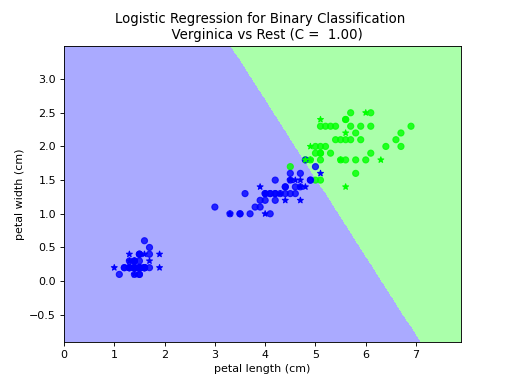

<ipython-input-56-87265c441f89>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


Text(0, 0.5, 'petal width (cm)')

In [56]:
h = .01 
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#0000FF', '#FF0000',  '#00FF00'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s = 30, alpha = 0.8, cmap=cmap_bold)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s = 30, alpha = 1, cmap=cmap_bold, marker = "*")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic Regression for Binary Classification \n  Verginica vs Rest (C = %5.2f)"  % (reg_strength))
plt.xlabel(format(iris_dataset.feature_names[2]))
plt.ylabel(format(iris_dataset.feature_names[3]))

**Calculate the accuracy of the model by using sklearn.metrics.accuracy_score( ), and print out the accuracy**

In [82]:
from sklearn.metrics import accuracy_score

# Calculate the predict target value for the testing data

y_test_pred = clf.fit(X_test, y_test).predict(X_test)
y_test_pred

array([ True, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False])

In [83]:
# calculate the prediction accuracy compared to y_test and print out the accuracy number
score = accuracy_score(y_test, y_test_pred)
print(f'Accuracy = {score}')


Accuracy = 0.9473684210526315


**Use different C values = [0.1,0.5,1,5] to train the model and calculate the corresponging accuracies. Plot the accuracy as a function of log10(C)**

In [78]:
c_values = [0.1, 0.5, 1, 5]
Accuracy = []

clf_1 = linear_model.LogisticRegression(penalty = "l2", C = c_values[0], solver='lbfgs')
clf_2 = linear_model.LogisticRegression(penalty = "l2", C = c_values[1], solver='lbfgs')
clf_3 = linear_model.LogisticRegression(penalty = "l2", C = c_values[2], solver='lbfgs')
clf_4 = linear_model.LogisticRegression(penalty = "l2", C = c_values[3], solver='lbfgs')

y_test_pred_1 = clf_1.fit(X_test, y_test).predict(X_test)
y_test_pred_2 = clf_2.fit(X_test, y_test).predict(X_test)
y_test_pred_3 = clf_3.fit(X_test, y_test).predict(X_test)
y_test_pred_4 = clf_4.fit(X_test, y_test).predict(X_test)

score_1 = accuracy_score(y_test, y_test_pred_1)
score_2 = accuracy_score(y_test, y_test_pred_2)
score_3 = accuracy_score(y_test, y_test_pred_3)
score_4 = accuracy_score(y_test, y_test_pred_4)

Accuracy = [score_1, score_2, score_3, score_4]
Accuracy

[0.8157894736842105,
 0.9210526315789473,
 0.9473684210526315,
 0.9473684210526315]

<IPython.core.display.Javascript object>


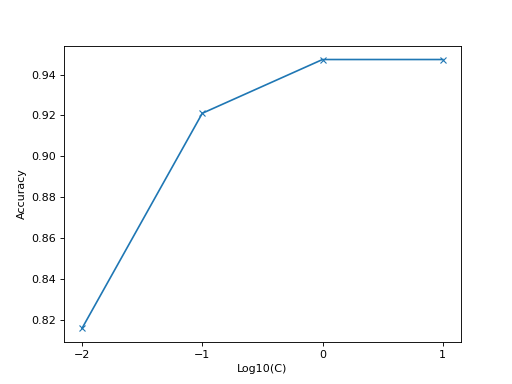

([<matplotlib.axis.XTick at 0x1de8d058130>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

In [79]:
plt.figure()
plt.xlabel('Log10(C)')
plt.ylabel('Accuracy')
plt.plot(np.log10(C_Values), Accuracy, '-x')
plt.xticks(np.log10(C_Values))